In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

## 2003 模型检验

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_03(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata03 = pd.read_csv("perlist03_h.csv")
    f = perdata03['f']
    per = perdata03['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata03)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [3]:
m03=Minuit(twi_minus_loglikelihood_03,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,3), limit_log_f_b=(-10,-2),limit_alpha_H=(1.0,30.0),limit_log_poisson=(0,3),
         errordef=1)

m03.migrad()

pprint(m03.fval)

FCN = 7406.891685441138 
 TOTAL NCALL = 375 
 NCALLS = 375 
 
 
 EDM = 8.301862961068803e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.09221,0.0416736,,,-3,3,No
1,log_f_b,-3.8883,7.03976,,,-10,-2,No
2,alpha_H,1.00001,0.158497,,,1,30,No
3,log_poisson,0.980196,0.0436688,,,0,3,No


7406.891685441138


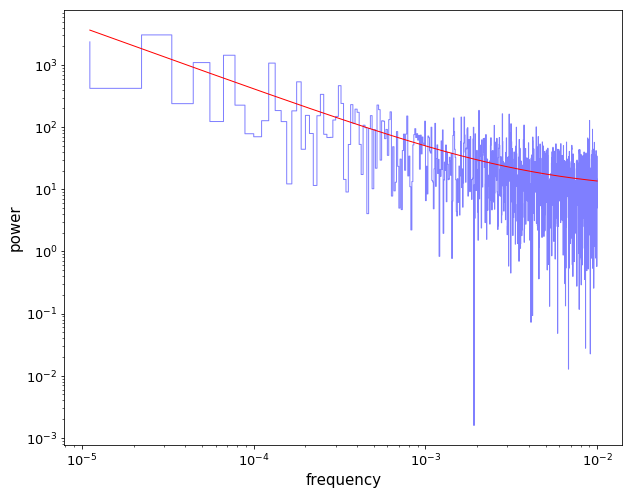

In [4]:
perdata03 = pd.read_csv("perlist03_h.csv")
f_03 = perdata03['f']
per_03 = perdata03['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m03.values[0],m03.values[1],m03.values[2],m03.values[3]

model_03 = []
f_length_03 = len(f_03)
for i in range(f_length_03):
    model_03.append(((f_03[i]**(-alpha_L))/(1+(f_03[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_03, per_03, color="b", alpha=0.5, linewidth=1)
plt.plot(f_03, model_03, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2003 模型比较

In [5]:
def twi_minus_loglikelihood_nobreak_03(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata03 = pd.read_csv("perlist03_h.csv")
    f = perdata03['f']
    per = perdata03['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata03)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [6]:
n03=Minuit(twi_minus_loglikelihood_nobreak_03,log_A=-5,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-8,-2),limit_alpha=(1.0,5.0),limit_log_poisson=(0,3),
         errordef=1)

n03.migrad()

print(n03.fval)

FCN = 7412.906894939155 
 TOTAL NCALL = 176 
 NCALLS = 176 
 
 
 EDM = 1.2076741943031089e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-2,0.0646087,,,-8,-2,No
1,alpha,1.18054,0.0142518,,,1,5,No
2,log_poisson,1.0866,0.027533,,,0,3,No


7412.906894939155


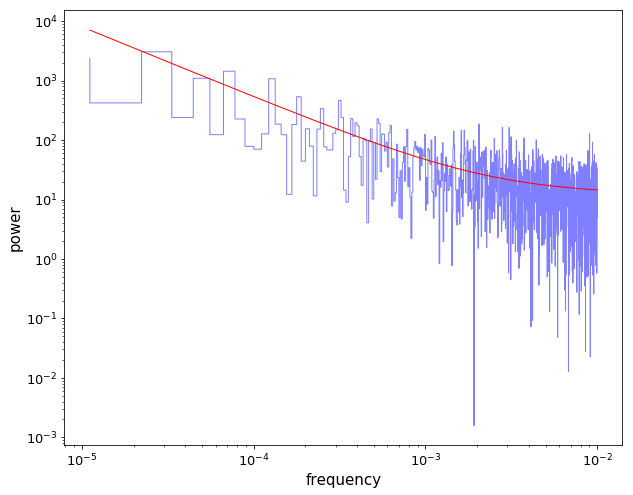

In [7]:
log_A,alpha,log_poisson = n03.values[0],n03.values[1],n03.values[2]

model_nob_03 = []
f_length_03 = len(f_03)
for i in range(f_length_03):
    model_nob_03.append((f_03[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_03, per_03, color="b", alpha=0.5, linewidth=1)
plt.plot(f_03, model_nob_03, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

6.015209498016702


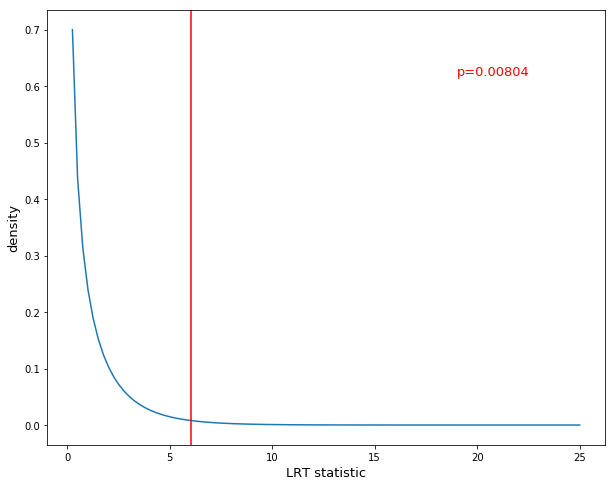

In [8]:
import scipy.stats as stats

# LRT statistic
T = n03.fval-m03.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2014(1) 模型检验

In [9]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_141(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata141 = pd.read_csv("perlist141_h.csv")
    f = perdata141['f']
    per = perdata141['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata141)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [10]:
m141=Minuit(twi_minus_loglikelihood_141,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,0), limit_log_f_b=(-7,0),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

m141.migrad()

pprint(m141.fval)

FCN = 3876.4457699544187 
 TOTAL NCALL = 557 
 NCALLS = 557 
 
 
 EDM = 3.746523226120879e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.4107,0.0961334,,,-3,0,No
1,log_f_b,-2.52158,0.236972,,,-7,0,No
2,alpha_H,2.45608,0.90954,,,1,5,No
3,log_poisson,0.935485,0.0695828,,,-3,3,No


3876.4457699544187


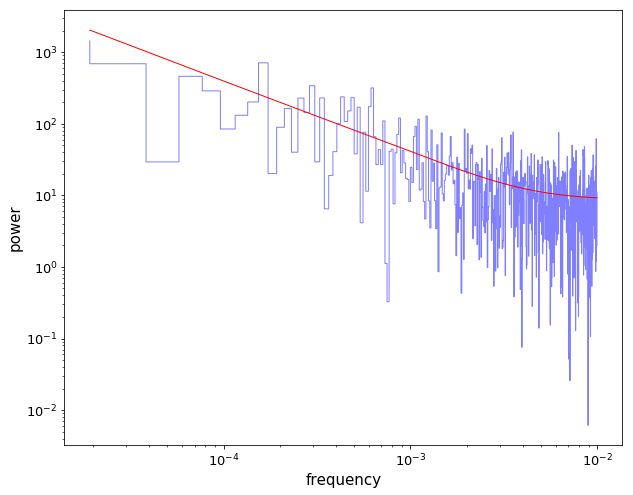

In [11]:
perdata141 = pd.read_csv("perlist141_h.csv")
f_141 = perdata141['f']
per_141 = perdata141['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m141.values[0],m141.values[1],m141.values[2],m141.values[3]

model_141 = []
f_length_141 = len(f_141)
for i in range(f_length_141):
    model_141.append(((f_141[i]**(-alpha_L))/(1+(f_141[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_141, per_141, color="b", alpha=0.5, linewidth=1)
plt.plot(f_141, model_141, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2014(1) 模型比较

In [12]:
def twi_minus_loglikelihood_nobreak_141(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata141 = pd.read_csv("perlist141_h.csv")
    f = perdata141['f']
    per = perdata141['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata141)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [13]:
n141=Minuit(twi_minus_loglikelihood_nobreak_141,log_A=-2,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,0),limit_alpha=(0.0,5.0),limit_log_poisson=(-2,3),
         errordef=1)

n141.migrad()

pprint(n141.fval)

FCN = 3878.1566149972514 
 TOTAL NCALL = 138 
 NCALLS = 138 
 
 
 EDM = 5.641804421119818e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.72793,0.396487,,,-3,0,No
1,alpha,1.08176,0.125649,,,0,5,No
2,log_poisson,0.767835,0.107316,,,-2,3,No


3878.1566149972514


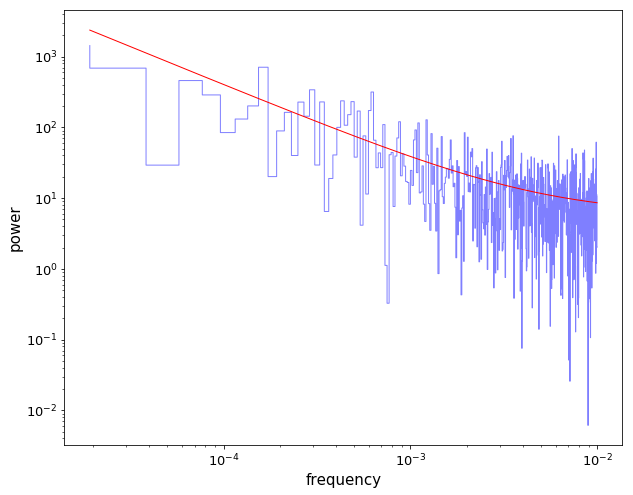

In [14]:
log_A,alpha,log_poisson = n141.values[0],n141.values[1],n141.values[2]

model_nob_141 = []
f_length_141 = len(f_141)
for i in range(f_length_141):
    model_nob_141.append((f_141[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_141, per_141, color="b", alpha=0.5, linewidth=1)
plt.plot(f_141, model_nob_141, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

1.710845042832716


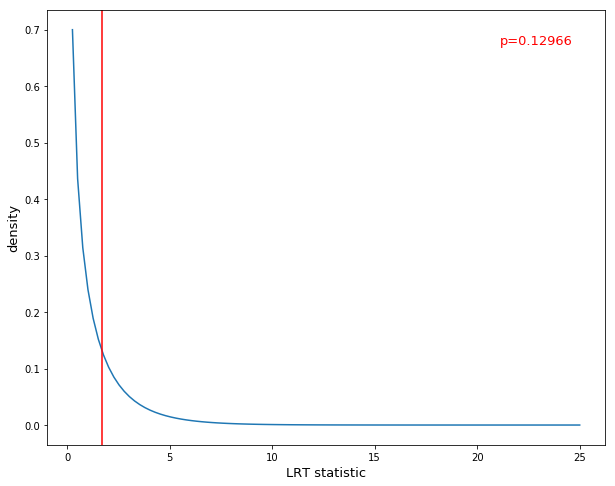

In [15]:
import scipy.stats as stats

# LRT statistic
T = n141.fval-m141.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2019 模型检验

In [16]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_19(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata19 = pd.read_csv("perlist19_h.csv")
    f = perdata19['f']
    per = perdata19['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata19)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [17]:
m19=Minuit(twi_minus_loglikelihood_19,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-5,0), limit_log_f_b=(-10,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

m19.migrad()

pprint(m19.fval)

FCN = 5449.137202508896 
 TOTAL NCALL = 471 
 NCALLS = 471 
 
 
 EDM = 3.190012311082115e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.39437,0.0707369,,,-5,0,No
1,log_f_b,-2.61598,0.121534,,,-10,-2,No
2,alpha_H,2.87037,0.956695,,,1,5,No
3,log_poisson,0.902343,0.0547999,,,-3,3,No


5449.137202508896


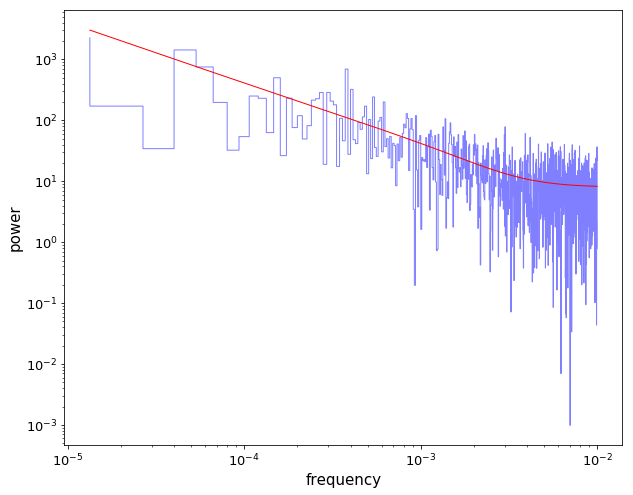

In [18]:
perdata19 = pd.read_csv("perlist19_h.csv")
f_19 = perdata19['f']
per_19 = perdata19['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m19.values[0],m19.values[1],m19.values[2],m19.values[3]

model_19 = []
f_length_19 = len(f_19)
for i in range(f_length_19):
    model_19.append(((f_19[i]**(-alpha_L))/(1+(f_19[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_19, per_19, color="b", alpha=0.5, linewidth=1)
plt.plot(f_19, model_19, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2019 模型比较

In [19]:
def twi_minus_loglikelihood_nobreak_19(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata19 = pd.read_csv("perlist19_h.csv")
    f = perdata19['f']
    per = perdata19['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata19)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [20]:
n19=Minuit(twi_minus_loglikelihood_nobreak_19,log_A=-2,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,0),limit_alpha=(0.0,5.0),limit_log_poisson=(-2,3),
         errordef=1)

n19.migrad()

pprint(n19.fval)

FCN = 5453.023297661507 
 TOTAL NCALL = 153 
 NCALLS = 153 
 
 
 EDM = 6.518050200563135e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.76451,0.310941,,,-3,0,No
1,alpha,1.09667,0.0989153,,,0,5,No
2,log_poisson,0.666768,0.101239,,,-2,3,No


5453.023297661507


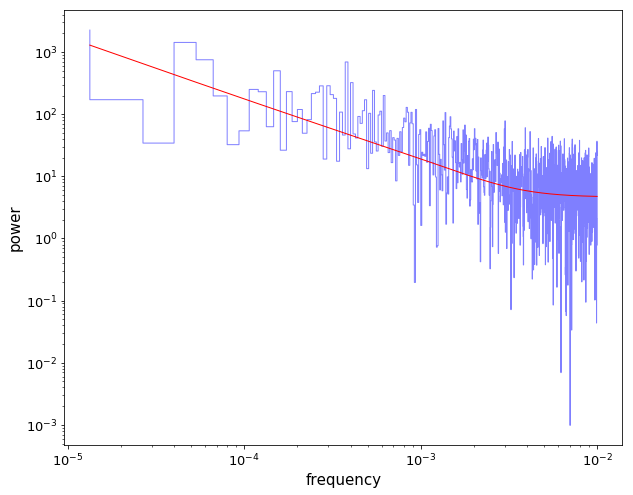

In [21]:
log_A,alpha,log_poisson = n19.values[0],n19.values[1],n19.values[2]

model_nob_19 = []
f_length_19 = len(f_19)
for i in range(f_length_19):
    model_nob_19.append(((f_19[i]**(-alpha_L))/(1+(f_19[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_19, per_19, color="b", alpha=0.5, linewidth=1)
plt.plot(f_19, model_nob_19, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

3.886095152611233


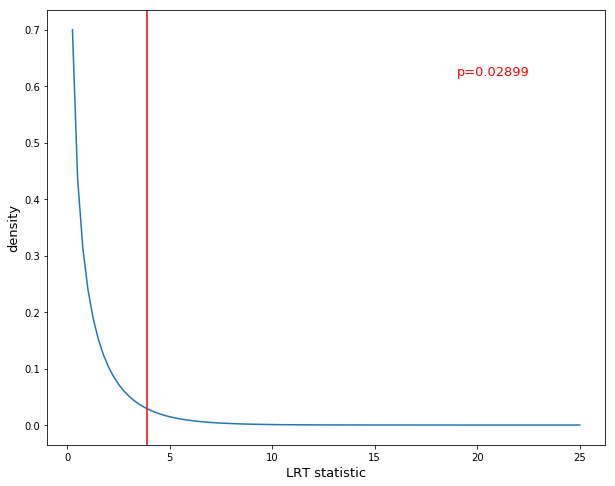

In [22]:
import scipy.stats as stats

# LRT statistic
T = n19.fval-m19.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 综合结果

In [23]:
data03 = pd.read_csv("energy_ngc4395_03.csv")  
x03 = data03['x']
y03 = data03['y']
xerr03 = data03['xerr']
yerr03 = data03['yerr']

data141 = pd.read_csv("energy_ngc4395_141.csv")  
x141 = data141['x']
y141 = data141['y']
xerr141 = data141['xerr']
yerr141 = data141['yerr']

data19 = pd.read_csv("energy_ngc4395_19.csv")  
x19 = data19['x']
y19 = data19['y']
xerr19 = data19['xerr']
yerr19 = data19['yerr']

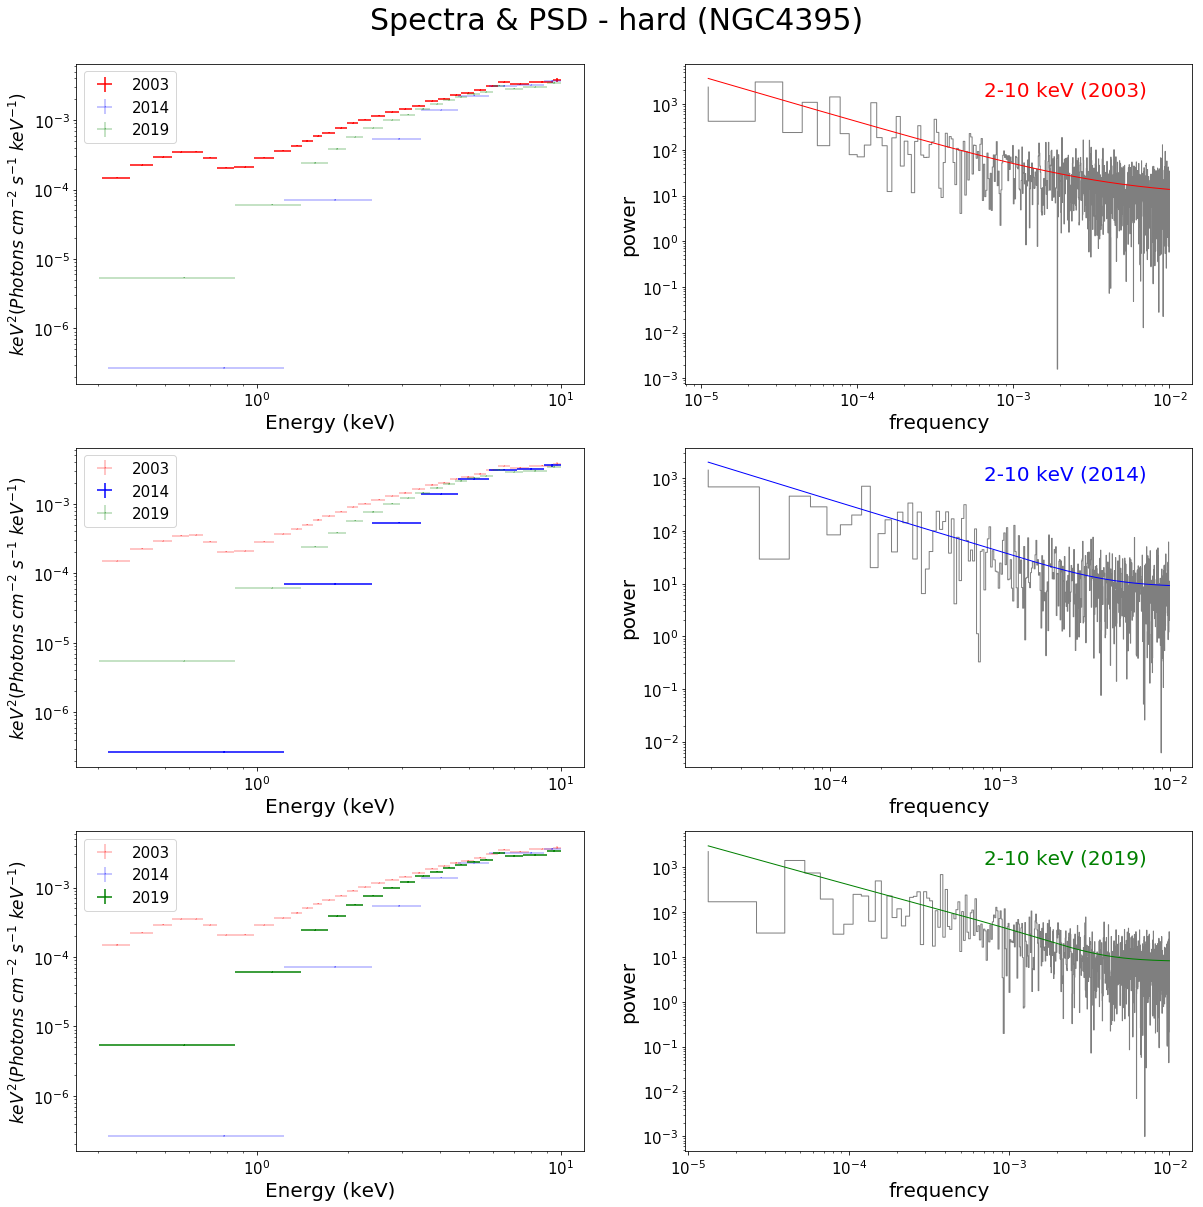

In [24]:
fig= plt.figure(figsize=(20,20))
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)


ax1.loglog()
ax1.errorbar(x03, y03, yerr=yerr03, xerr=xerr03, fmt=',r', label='2003')
ax1.errorbar(x141, y141, yerr=yerr141, xerr=xerr141, fmt=',b', alpha=0.3, label='2014')
ax1.errorbar(x19, y19, yerr=yerr19, xerr=xerr19, fmt=',g', alpha=0.3, label='2019')
ax1.set_xlabel("Energy (keV)",fontsize=20)
ax1.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=15)

ax3.loglog()
ax3.errorbar(x03, y03, yerr=yerr03, xerr=xerr03, fmt=',r', alpha=0.3, label='2003')
ax3.errorbar(x141, y141, yerr=yerr141, xerr=xerr141, fmt=',b', label='2014')
ax3.errorbar(x19, y19, yerr=yerr19, xerr=xerr19, fmt=',g', alpha=0.3, label='2019')
ax3.set_xlabel("Energy (keV)",fontsize=20)
ax3.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax3.legend(fontsize=15)
ax3.tick_params(labelsize=15)

ax5.loglog()
ax5.errorbar(x03, y03, yerr=yerr03, xerr=xerr03, fmt=',r', alpha=0.3, label='2003')
ax5.errorbar(x141, y141, yerr=yerr141, xerr=xerr141, fmt=',b', alpha=0.3, label='2014')
ax5.errorbar(x19, y19, yerr=yerr19, xerr=xerr19, fmt=',g', label='2019')
ax5.set_xlabel("Energy (keV)",fontsize=20)
ax5.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax5.legend(fontsize=15)
ax5.tick_params(labelsize=15)


ax2.loglog()
ax2.step(f_03, per_03, color="k", alpha=0.5, linewidth=1)
ax2.plot(f_03, model_03, color="r", linewidth=1)
ax2.set_xlabel("frequency",fontsize=20)
ax2.set_ylabel("power",fontsize=20)
ax2.text(0.75,0.9,"2-10 keV (2003)",color='r',ha='center',transform=ax2.transAxes,fontsize=20)
ax2.tick_params(labelsize=15)

ax4.loglog()
ax4.step(f_141, per_141, color="k", alpha=0.5, linewidth=1)
ax4.plot(f_141, model_141, color="b", linewidth=1)
ax4.set_xlabel("frequency",fontsize=20)
ax4.set_ylabel("power",fontsize=20)
ax4.text(0.75,-0.3,"2-10 keV (2014)",color='b',ha='center',transform=ax2.transAxes,fontsize=20)
ax4.tick_params(labelsize=15)

ax6.loglog()
ax6.step(f_19, per_19, color="k", alpha=0.5, linewidth=1)
ax6.plot(f_19, model_19, color="g", linewidth=1)
ax6.set_xlabel("frequency",fontsize=20)
ax6.set_ylabel("power",fontsize=20)
ax6.text(0.75,-1.5,"2-10 keV (2019)",color='g',ha='center',transform=ax2.transAxes,fontsize=20)
ax6.tick_params(labelsize=15)


plt.suptitle("Spectra & PSD - hard (NGC4395)", x=0.5, y=0.92, fontsize=30)
plt.show()